### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [77]:
data = pd.read_csv('data/coupons.csv')

In [78]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [79]:
# Get the gerneral dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [80]:
# Summerize the Null value in the dataframe
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

# Data define and reclassify 
At First, converted string to easy read value for columns "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"

In [81]:
# Create a function for multiple columns' value reclassify
def purpose(x):
    if x == 'never' or x == 'less1':
        return '0'
    elif x == '1~3':
        return '1<=X<=3'
    elif x == '4~8':
        return '4<=X<=8'
    elif x == 'gt8':
        return 'X>8'
    else:
        return x

# Replace the value in specific columns for easy reading
revised_df = data

revised_df['Bar'] = revised_df['Bar'].apply(purpose)
revised_df['CoffeeHouse'] = revised_df['CoffeeHouse'].apply(purpose)
revised_df['CarryAway'] = revised_df['CarryAway'].apply(purpose)
revised_df['RestaurantLessThan20'] = revised_df['RestaurantLessThan20'].apply(purpose)
revised_df['Restaurant20To50'] = revised_df['Restaurant20To50'].apply(purpose)

Secondly, reclassify value column "age", and convert string to number to help range selection.

In [82]:
# Create a function for column value "age" reclassify
def purpose(x):
    if x == 'below21':
        return '21'
    elif x == '50plus':
        return '50'
    else:
      return x

# Replace the value in specific columns for easy reading
revised_df['age'] = revised_df['age'].apply(purpose)
revised_df['age'] = pd.to_numeric(revised_df['age'])

A quick info display shows that colmn "car" has almost 99% on Null data and 1% of the useless data. So I decided to drop this column for this data analysis

In [83]:
# Create new DataFrame but exclude column "car" due to major Null data
exclude_df = revised_df.loc[:, data.columns != 'car']

In [84]:
exclude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [85]:
# Rename mispell column "passanger" to "passenger"
exclude_df = exclude_df.rename(columns = {'passanger': 'passenger'})

In [86]:
exclude_df.head(3)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,NaN,4<=X<=8,1<=X<=3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,NaN,4<=X<=8,1<=X<=3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,NaN,4<=X<=8,1<=X<=3,1,1,0,0,1,1


4. What proportion of the total observations chose to accept the coupon? 



In [87]:
# Verify the total count of column Y (as Coupon Acceptance counts)
exclude_df.Y.value_counts()

1    7210
0    5474
Name: Y, dtype: int64

<Axes: xlabel='Y', ylabel='Count'>

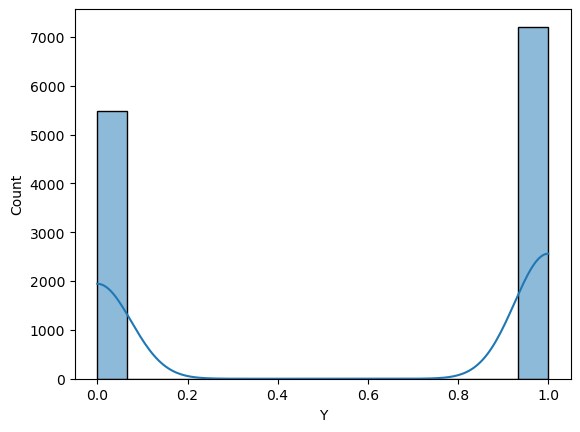

In [88]:
# Create a histogram for column Y (as Coupon Acceptance counts) with kde
sns.histplot(exclude_df, x = 'Y', kde = True)

In [89]:
# Calculate the percetage of 1 (as True = Accept) and 0 (as False = NOT Accept) in column Y
total_coupon_accpet_raito = exclude_df['Y'].value_counts(True).mul(100).round(2).astype(str) + '%'
print('The proportion of the total observations chose to accept the coupon is', total_coupon_accpet_raito[1])

The proportion of the total observations chose to accept the coupon is 56.84%


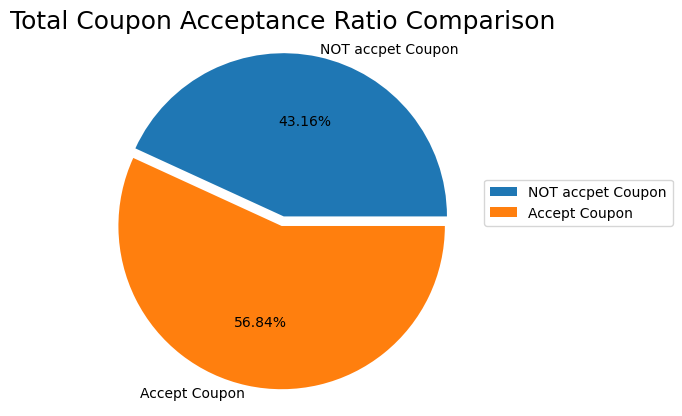

In [90]:
# Create a pieplot as 'Total Coupon Acceptance Ratio Comparison' for visualization purpose
total_coupon_accpet_raito = exclude_df['Y'].value_counts(True)

fig_q_4 = np.array([total_coupon_accpet_raito[0], total_coupon_accpet_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_q_4, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Total Coupon Acceptance Ratio Comparison', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [91]:
# Verify the total count of column "coupon" in each different categories
exclude_df.coupon.value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

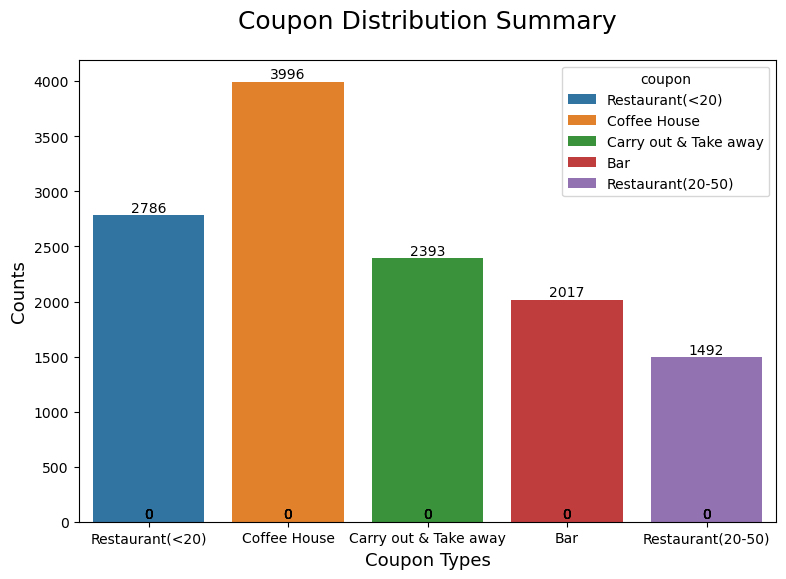

In [92]:
# Create a histogram plot as 'Coupon Distribution Summary' for visualization purpose

# Set size of the plot figure
plt.figure(figsize = (9,6))

# Count plot for each unique categorical variable
# Use countplot becuase the value in column "coupon" is discrete (not continue number value)
coupon_bar = sns.countplot(data = exclude_df, x = 'coupon', hue = 'coupon', dodge = False)

# Display count number on the bar based on count
for container in coupon_bar.containers:
    coupon_bar.bar_label(container)

# Add Plot title, x-axis label and y-axis lable
plt.xlabel('Coupon Types', fontsize = 13)
plt.ylabel('Counts', fontsize = 13)
plt.title('Coupon Distribution Summary', y = 1.05, fontsize = 18)

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

In [93]:
# Verify the total count of column "temperature" in each different categories
exclude_df.temperature.value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

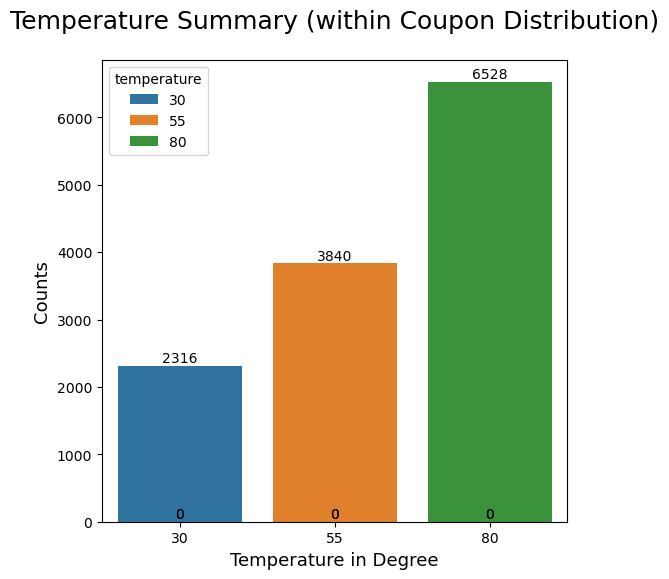

In [94]:
# Create histogram plot for column "temperature" for visualization purpose

# Set size of the plot figure. Use a histogram to visualize the temperature column.
plt.figure(figsize = (6,6))

# Use countplot instead of hist, becuase the value in column "temperature" is discrete (not continue number)
temperature_hist = sns.countplot(data = exclude_df, x = 'temperature', hue = 'temperature', dodge = False)

# Display count number on the bar based on count
for container in temperature_hist.containers:
    temperature_hist.bar_label(container)
    
# Add Plot title, x-axis label and y-axis lable
plt.xlabel('Temperature in Degree', fontsize = 13)
plt.ylabel('Counts', fontsize = 13)
plt.title('Temperature Summary (within Coupon Distribution)', y = 1.05, fontsize = 18)

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [95]:
# Create a dataframe for column "coupon" == bar
bar_df = exclude_df[exclude_df['coupon'] == 'Bar'].reset_index()
bar_df.head(3)

,index,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,...,0,NaN,4<=X<=8,1<=X<=3,1,1,0,0,1,0
1,13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,...,0,NaN,4<=X<=8,1<=X<=3,1,0,0,1,0,1
2,17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,...,0,NaN,4<=X<=8,1<=X<=3,1,1,1,0,1,0


2. What proportion of bar coupons were accepted?


In [96]:
# Verify the total count of column Y (as Coupon Acceptance counts), within Bar Coupon Acceptance dataframe
bar_accept_ratio = bar_df['Y'].value_counts(1)
bar_accept_ratio

0    0.589985
1    0.410015
Name: Y, dtype: float64

In [97]:
# Calculate the percetage of 1 (as True = Accept) and 0 (as False = NOT Accept) in column Y
bar_accept_ratio = bar_df['Y'].value_counts(True).mul(100).round(2).astype(str) + '%'
print('The proportion of the Bar coupon accepted is', bar_accept_ratio[1])

The proportion of the Bar coupon accepted is 41.0%


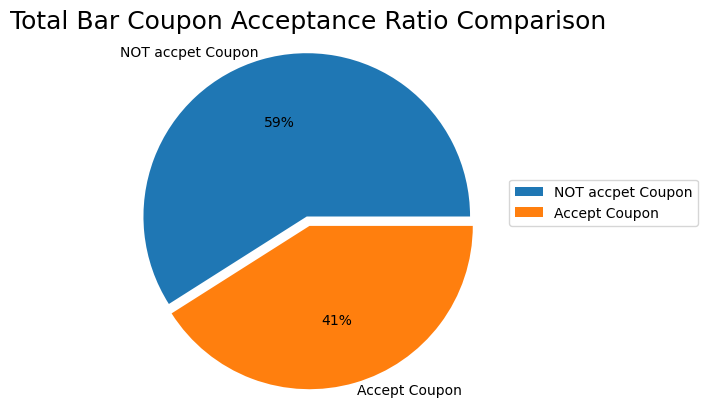

In [98]:
# Create a pieplot for visualization purpose

bar_accept_ratio = bar_df['Y'].value_counts(True)

fig_q2 = np.array([bar_accept_ratio[0], bar_accept_ratio[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_q2, labels = mylabels, autopct = '%0.f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Total Bar Coupon Acceptance Ratio Comparison', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [99]:
# Verify the total count of column "Bar" in different visit times
bar_df.Bar.value_counts()

0          1400
1<=X<=3     397
4<=X<=8     150
X>8          49
Name: Bar, dtype: int64

In [100]:
# Filter customers who went to Bar 3 or fewer times a month
bar_3orless = bar_df[bar_df['Bar'] == '1<=X<=3']
bar_3orless['Y'].value_counts()

1    257
0    140
Name: Y, dtype: int64

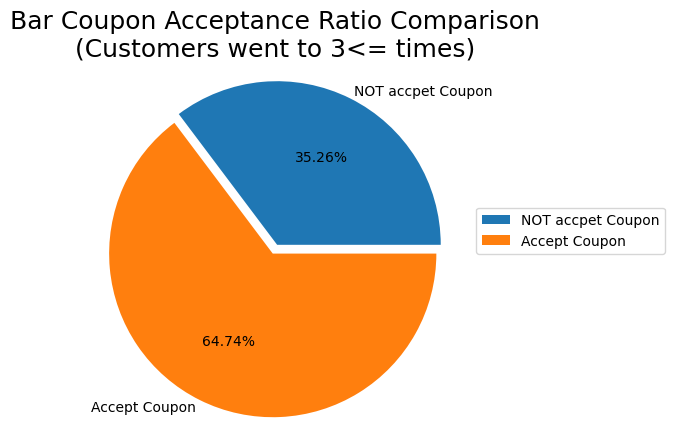

In [101]:
# Create a pieplot for visualization purpose
bar_3orless_raito = bar_3orless['Y'].value_counts(True)

fig_bar_3orless = np.array([bar_3orless_raito[0], bar_3orless_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_3orless, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Bar Coupon Acceptance Ratio Comparison\n(Customers went to 3<= times)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [102]:
# Filter customers who went to Bar 3 or more times a month
bar_3ormore = bar_df[(bar_df['Bar'] == '4<=X<=8') | (bar_df['Bar'] == 'X>8')]
bar_3ormore['Y'].value_counts()

1    153
0     46
Name: Y, dtype: int64

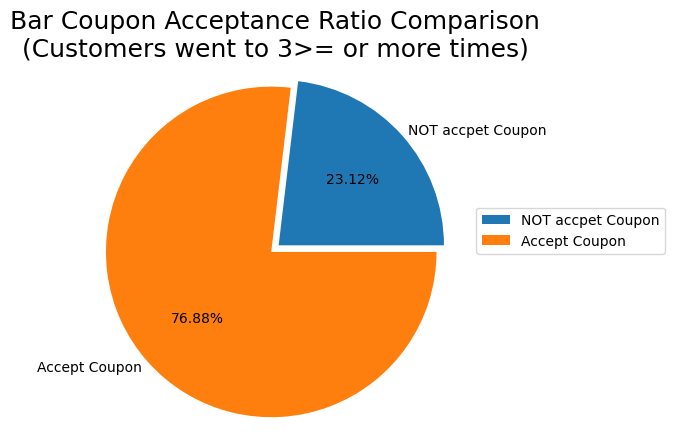

In [103]:
# Create a pieplot for visualization purpose
bar_3ormore_raito = bar_3ormore['Y'].value_counts(True)

fig_bar_3ormore = np.array([bar_3ormore_raito[0], bar_3ormore_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_3ormore, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Bar Coupon Acceptance Ratio Comparison\n(Customers went to 3>= or more times)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [104]:
# Filter drivers who went to Bar 1 or more times a month
bar_1ormore = bar_df[(bar_df['Bar'] == '1<=X<=3') | (bar_df['Bar'] == '4<=X<=8') | (bar_df['Bar'] == 'X>8')]
bar_1ormore['Y'].value_counts()

1    410
0    186
Name: Y, dtype: int64

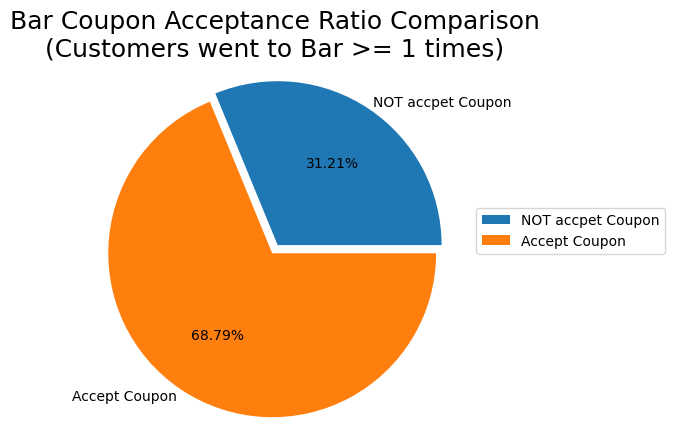

In [105]:
# Create a pieplot for visualization purpose
bar_1ormore_raito = bar_1ormore['Y'].value_counts(True)

fig_bar_1ormore = np.array([bar_1ormore_raito[0], bar_1ormore_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_1ormore, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Bar Coupon Acceptance Ratio Comparison\n(Customers went to Bar >= 1 times)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [106]:
# Filter drivers who age > 25
bar_ageover25 = bar_1ormore[bar_1ormore['age'] > 25]
bar_ageover25['Y'].value_counts()

1    292
0    128
Name: Y, dtype: int64

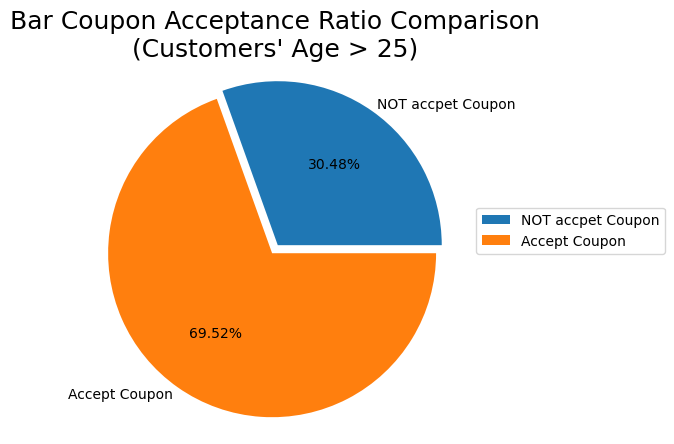

In [107]:
# Create a pieplot as 'Total Coupon Acceptance Ratio Comparison' for visualization purpose
bar_ageover25_raito = bar_ageover25['Y'].value_counts(True)

fig_bar_ageover25 = np.array([bar_ageover25_raito[0], bar_ageover25_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_ageover25, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title("Bar Coupon Acceptance Ratio Comparison\n(Customers' Age > 25)", fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

**Brief Summary**

According to above pieplots, the Bar coupon acceptance ratio between 1) drivers who go to a bar more than once a month (68.79%) and 2) are over the age of 25 (69.52%) to the all others are not much different.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [108]:
# Filter drivers who went to Bar 1 or more times a month
bar_1ormore = bar_df[(bar_df['Bar'] == '1<=X<=3') | (bar_df['Bar'] == '4<=X<=8') | (bar_df['Bar'] == 'X>8')]
bar_1ormore['Y'].value_counts()

1    410
0    186
Name: Y, dtype: int64

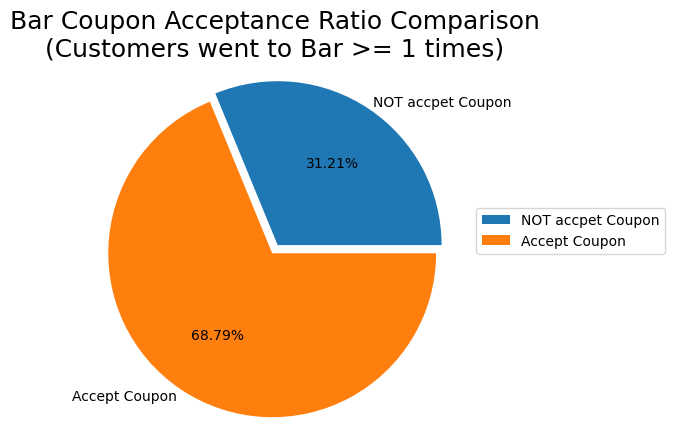

In [109]:
# Create a pieplot for visualization purpose
bar_1ormore_raito = bar_1ormore['Y'].value_counts(True)

fig_bar_1ormore = np.array([bar_1ormore_raito[0], bar_1ormore_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_1ormore, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Bar Coupon Acceptance Ratio Comparison\n(Customers went to Bar >= 1 times)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [110]:
# Filter drivers with passengers that were NOT kids
bar_nokid_incar = bar_df[bar_df['passenger'] != 'Kid(s)']
bar_nokid_incar['Y'].value_counts()

0    1027
1     784
Name: Y, dtype: int64

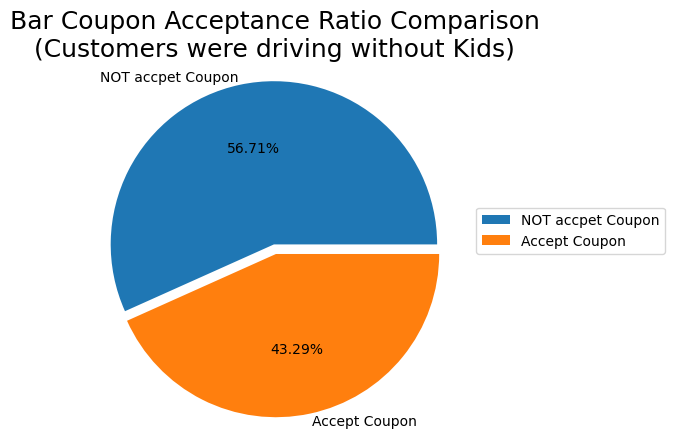

In [111]:
# Create a pieplot for visualization purpose
bar_nokid_incar_raito = bar_nokid_incar['Y'].value_counts(True)

fig_bar_nokid_incar = np.array([bar_nokid_incar_raito[0], bar_nokid_incar_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_nokid_incar, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Bar Coupon Acceptance Ratio Comparison\n(Customers were driving without Kids)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [112]:
# Filter drivers who does not work as farming, fishing, or forestry
bar_not_a_farmer = bar_df[bar_df['occupation'] != 'Farming Fishing & Forestry']
bar_not_a_farmer['Y'].value_counts()

0    1185
1     823
Name: Y, dtype: int64

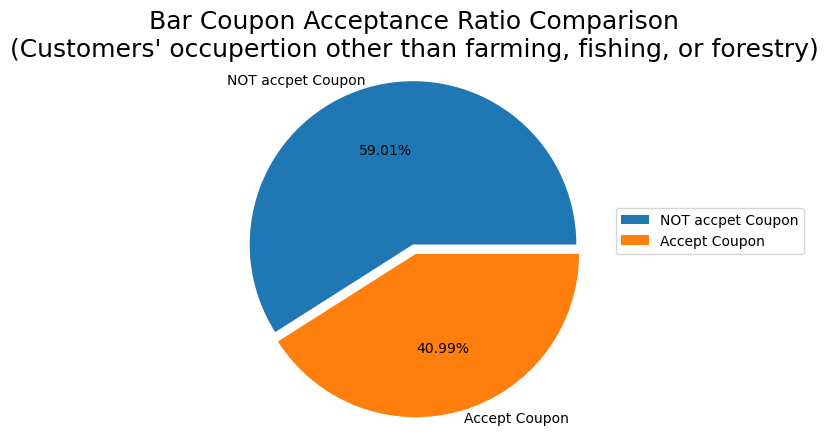

In [113]:
# Create a pieplot for visualization purpose
bar_not_a_farmer_raito = bar_not_a_farmer['Y'].value_counts(True)

fig_bar_not_a_farmer = np.array([bar_not_a_farmer_raito[0], bar_not_a_farmer_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_not_a_farmer, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title("Bar Coupon Acceptance Ratio Comparison\n(Customers' occupertion other than farming, fishing, or forestry)", fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

**Brief Summary**

According to above pieplots, the Bar coupon acceptance ratio between 1) drivers who go to a bar more than once a month (68.79%) and 2) had passengers that were not a kid (43.29%) and 3) whose occupations other than farming, fishing, or forestry (40.99%), shows that customer who were driving without kids surprisingly has lower Bar coupon acceptance ratio, while customers whose occupations as farmers more likely to accepted Bar coupon than other occupations.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [114]:
# Filter drivers who went to Bar 1 or more times a month
bar_1ormore = bar_df[(bar_df['Bar'] == '1<=X<=3') | (bar_df['Bar'] == '4<=X<=8') | (bar_df['Bar'] == 'X>8')]

# Filter drivers with passengers that were NOT kids
bar_1ormore_nokid_incar = bar_1ormore[bar_1ormore['passenger'] != 'Kid(s)']
bar_1ormore_nokid_incar['Y'].value_counts()

bar_1ormore_nokid_incar['Y'].value_counts()

1    393
0    158
Name: Y, dtype: int64

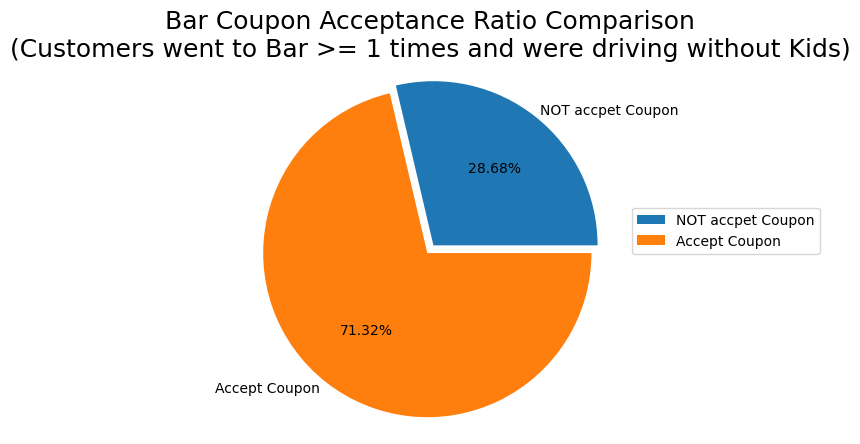

In [115]:
# Create a pieplot for visualization purpose
bar_1ormore_nokid_incar_raito = bar_1ormore_nokid_incar['Y'].value_counts(True)

fig_bar_1ormore_nokid_incar = np.array([bar_1ormore_nokid_incar_raito[0], bar_1ormore_nokid_incar_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_1ormore_nokid_incar, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Bar Coupon Acceptance Ratio Comparison\n(Customers went to Bar >= 1 times and were driving without Kids)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [116]:
# Filter drivers who went to Bar 1 or more times a month
bar_1ormore = bar_df[(bar_df['Bar'] == '1<=X<=3') | (bar_df['Bar'] == '4<=X<=8') | (bar_df['Bar'] == 'X>8')]

# Filter drivers with passengers that were NOT kids and their maritalStatus is NOT Widowed
bar_1ormore_notWidowed = bar_1ormore[bar_1ormore['maritalStatus'] != 'Widowed']
bar_1ormore_notWidowed['Y'].value_counts()

1    410
0    186
Name: Y, dtype: int64

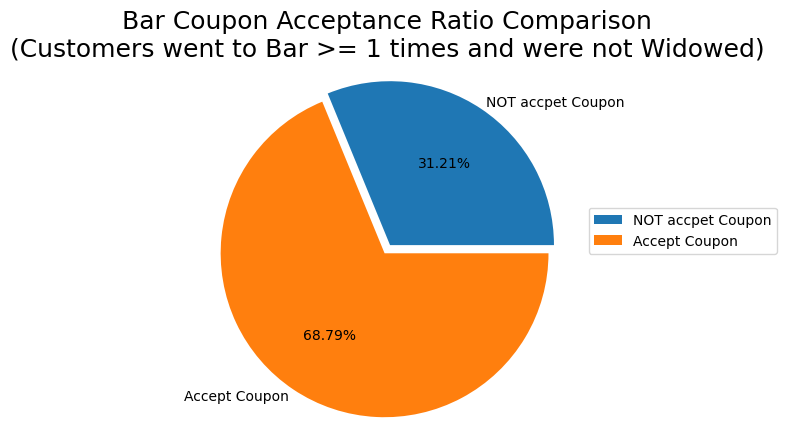

In [117]:
# Create a pieplot for visualization purpose
bar_1ormore_notWidowed_raito = bar_1ormore_notWidowed['Y'].value_counts(True)

fig_bar_1ormore_notWidowed_raito = np.array([bar_1ormore_notWidowed_raito[0], bar_1ormore_notWidowed_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_1ormore_notWidowed_raito, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Bar Coupon Acceptance Ratio Comparison\n(Customers went to Bar >= 1 times and were not Widowed)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

**Brief Summary**

According to above pieplots, the Bar coupon acceptance ratio between 1) drivers who went to a bar more than once a month and were driving without Kids (71.32%) and 2) drivers who went to a bar more than once a month and were not Widowed (68.79%), for customers who went to bar more than once a month, customers who driving without Kids have slightly higher Bar coupon accepance ratio than those were not Widowed.

In [118]:
# Filter drivers who went to Bar 1 or more times a month
bar_1ormore = bar_df[(bar_df['Bar'] == '1<=X<=3') | (bar_df['Bar'] == '4<=X<=8') | (bar_df['Bar'] == 'X>8')]
bar_1ormore['Y'].value_counts()

1    410
0    186
Name: Y, dtype: int64

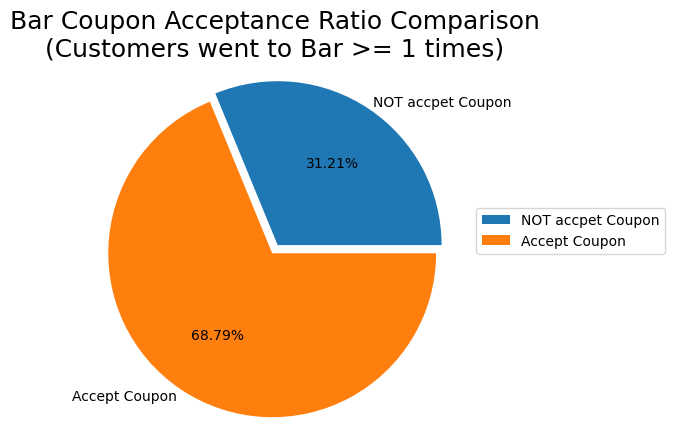

In [119]:
# Create a pieplot for visualization purpose
bar_1ormore_raito = bar_1ormore['Y'].value_counts(True)

fig_bar_1ormore = np.array([bar_1ormore_raito[0], bar_1ormore_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_1ormore, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Bar Coupon Acceptance Ratio Comparison\n(Customers went to Bar >= 1 times)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [120]:
# Filter drivers with age < 30
bar_driver_under30 = bar_df[bar_df['age'] < 30]
bar_driver_under30['Y'].value_counts()

0    459
1    440
Name: Y, dtype: int64

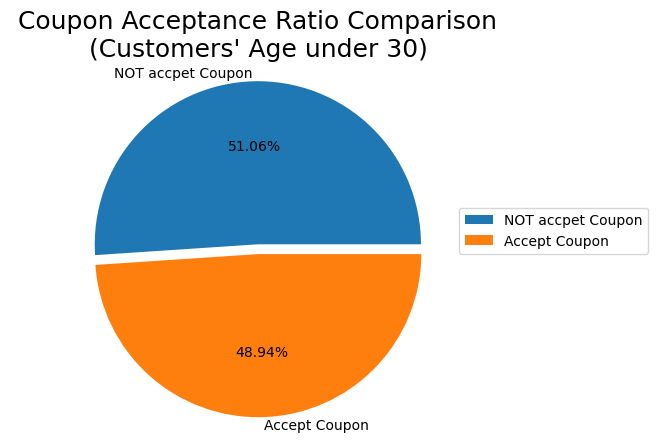

In [121]:
# Create a pieplot for visualization purpose
bar_driver_under30_raito = bar_driver_under30['Y'].value_counts(True)

fig_bar_driver_under30 = np.array([bar_driver_under30_raito[0], bar_driver_under30_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_driver_under30, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title("Coupon Acceptance Ratio Comparison\n(Customers' Age under 30)", fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

**Brief Summary**

According to above pieplots, the Bar coupon acceptance ratio between 1) drivers who go to a bar more than once a month (68.79%) and 2) whose Ages are under 30 (48.94%), customers whose Ages under 30 are more likely to accept the bar coupon than other age group.

In [122]:
# Filter customers who only went to cheap (less expensive) restaurants (under $20) 4 or more times a mount
bar_rest_under20 = bar_df[(bar_df['RestaurantLessThan20'] == '4<=X<=8') | 
                          (bar_df['RestaurantLessThan20'] == 'X>8')
                         ]
bar_rest_under20['Y'].value_counts()

0    427
1    327
Name: Y, dtype: int64

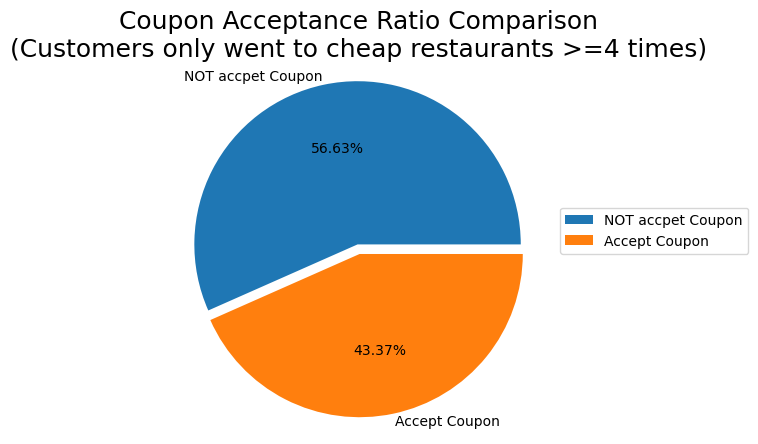

In [123]:
# Create a pieplot for visualization purpose
bar_rest_under20_raito = bar_rest_under20['Y'].value_counts(True)

fig_bar_rest_under20 = np.array([bar_rest_under20_raito[0], bar_rest_under20_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_rest_under20, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title("Coupon Acceptance Ratio Comparison\n(Customers only went to cheap restaurants >=4 times)", fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [124]:
# Filter customers who has income < 50K
bar_income_less50k = bar_df[
    (bar_df['income'] == 'Less than $12500')| 
    (bar_df['income'] == '$12500 - $24999') |
    (bar_df['income'] == '$25000 - $37499') |
    (bar_df['income'] == '$37500 - $49999')
]
bar_income_less50k['Y'].value_counts()

0    606
1    432
Name: Y, dtype: int64

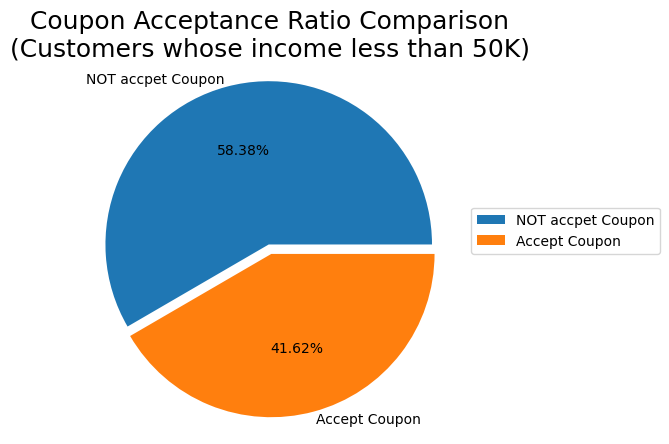

In [125]:
# Create a pieplot for visualization purpose
bar_income_less50k_raito = bar_income_less50k['Y'].value_counts(True)

fig_bar_income_less50k = np.array([bar_income_less50k_raito[0], bar_income_less50k_raito[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_bar_income_less50k, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title("Coupon Acceptance Ratio Comparison\n(Customers whose income less than 50K)", fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

**Brief Summary**

According to above pieplots, the Bar coupon acceptance ratio between 1) drivers who only went to a cheap restaurants more than 4 times a month (43.37%) and 2) drivers whose income is less than 50K (41.62%), customers went to a cheap restaurants more than 4 times a month have slightly higher Bar coupon accepance ratio than those income less than 50K. In addition, Customers' age, occupation, marital status, and income could also influence customers' decision making, but will need further investigation to define the impact as an individual factor or as a group factors.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Conclusion

From above data analysis, the more times customers went to a Bar once a month, the higher chance for customers to accept the Bar coupon. Customers who were driving without Kids and also their occupations were not farmers more likely to accept the Bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Searching for interesting pattern of behaviors

1. Quick value counts under column "coupon" for each different coupon types 

In [126]:
# Verify the total count of column "coupon".
exclude_df.coupon.value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

2. Target column value = "Coffee House" becase of the highest number counts as further coupon acceptance investigation and data analysis

In [127]:
# Create a dataframe for column "coupon" == Coffee House
coffee_house_df = exclude_df[exclude_df['coupon'] == 'Coffee House'].reset_index()
coffee_house_df.head(3)

,index,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,...,0,NaN,4<=X<=8,1<=X<=3,1,0,0,0,1,0
1,3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,...,0,NaN,4<=X<=8,1<=X<=3,1,1,0,0,1,0
2,4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,...,0,NaN,4<=X<=8,1<=X<=3,1,1,0,0,1,0


In [128]:
# Verify the total count of column Y (as Coupon Acceptance counts), within Coffee House Coupon Acceptance dataframe
coffee_house_accept_ratio = coffee_house_df['Y'].value_counts(1)
coffee_house_accept_ratio

0    0.500751
1    0.499249
Name: Y, dtype: float64

In [129]:
# Calculate the percetage of 1 (as True = Accept) and 0 (as False = NOT Accept) in column Y
coffee_house_accept_ratio = coffee_house_df['Y'].value_counts(True).mul(100).round(2).astype(str) + '%'
print('The proportion of the Coffee House coupon accepted is', coffee_house_accept_ratio[1])

The proportion of the Coffee House coupon accepted is 49.92%


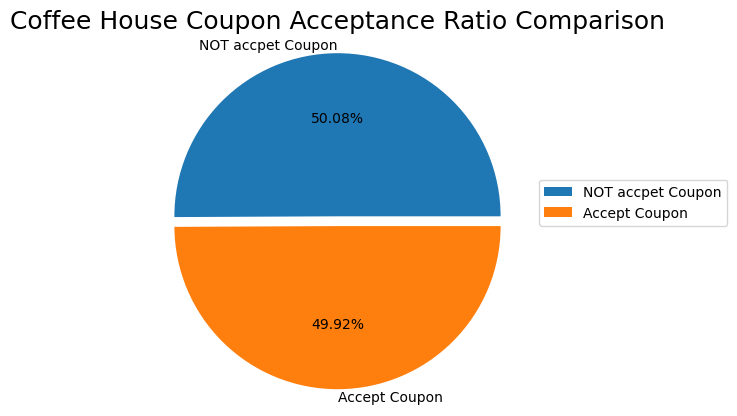

In [130]:
# Create a pieplot for visualization purpose

coffee_house_accept_ratio = coffee_house_df['Y'].value_counts(True)

fig_coffee = np.array([coffee_house_accept_ratio[0], coffee_house_accept_ratio[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_coffee, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Coffee House Coupon Acceptance Ratio Comparison', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

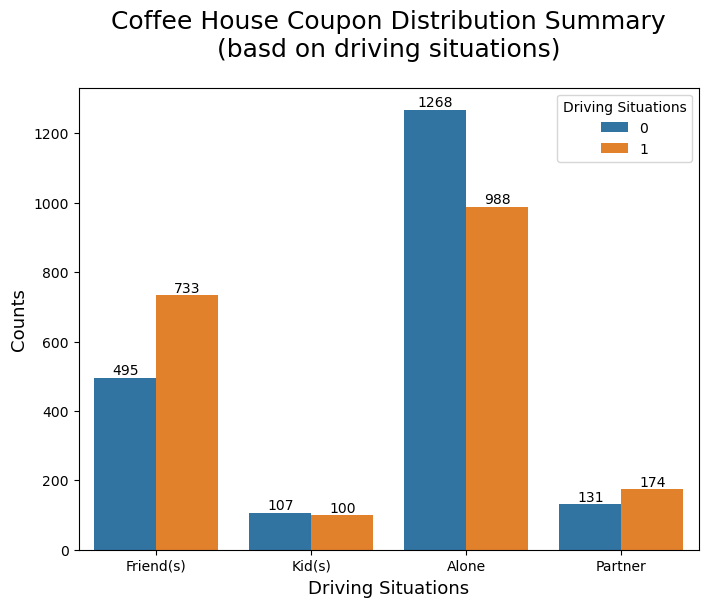

In [131]:
# Create a histogram for column "passenger" for Coffee House coupon group

# Set size of the plot figure
plt.figure(figsize = (8,6))

# Count plot for each unique categorical variable
# Use countplot becuase the value in column "passenger" is discrete (not continue number value)
coffee_house_df = sns.countplot(data = coffee_house_df, x = 'passenger', 
                                                 hue = 'Y')

# Display count number on the bar based on count
for container in coffee_house_df.containers:
    coffee_house_df.bar_label(container)

# Add Plot title, x-axis label, y-axis lable, and legend
plt.xlabel('Driving Situations', fontsize = 13)
plt.ylabel('Counts', fontsize = 13)
plt.title('Coffee House Coupon Distribution Summary\n(basd on driving situations)', 
          y = 1.05, fontsize = 18)

plt.legend(title = "Driving Situations")

# Show the plot
plt.show()

In [132]:
coffee_house_df = exclude_df[exclude_df['coupon'] == 'Coffee House'].reset_index()

In [133]:
coffee_house_alone_incar = coffee_house_df[coffee_house_df['passenger'] == 'Alone']
coffee_house_alone_incar['Y'].value_counts()

0    1268
1     988
Name: Y, dtype: int64

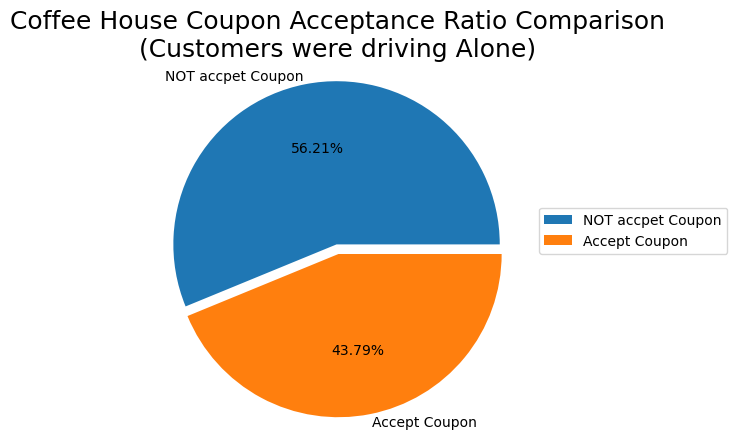

In [134]:
# Create a pieplot for visualization purpose

coffee_house_alone_incar_ratio = coffee_house_alone_incar['Y'].value_counts(True)

fig_coffee_house_alone_incar = np.array([coffee_house_alone_incar_ratio[0], coffee_house_alone_incar_ratio[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_coffee_house_alone_incar, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Coffee House Coupon Acceptance Ratio Comparison\n(Customers were driving Alone)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [135]:
coffee_house_friends_incar = coffee_house_df[coffee_house_df['passenger'] == 'Friend(s)']
coffee_house_friends_incar['Y'].value_counts()

1    733
0    495
Name: Y, dtype: int64

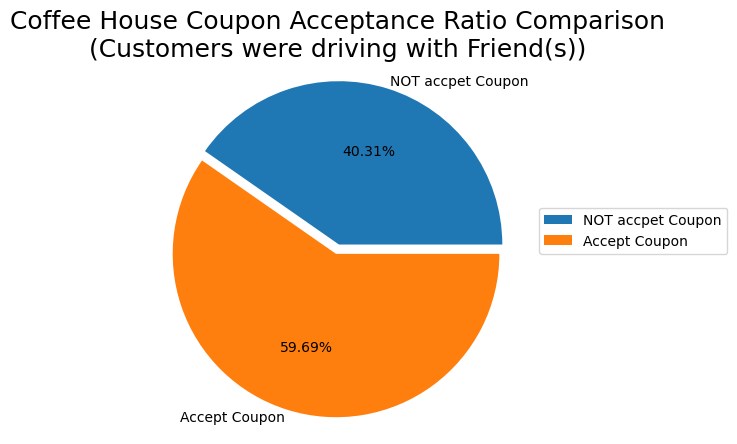

In [136]:
# Create a pieplot for visualization purpose

coffee_house_friends_incar_ratio = coffee_house_friends_incar['Y'].value_counts(True)

fig_coffee_house_friends_incar = np.array([coffee_house_friends_incar_ratio[0], coffee_house_friends_incar_ratio[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_coffee_house_friends_incar, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Coffee House Coupon Acceptance Ratio Comparison\n(Customers were driving with Friend(s))', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [137]:
coffee_house_Kids_incar = coffee_house_df[coffee_house_df['passenger'] == 'Kid(s)']
coffee_house_Kids_incar['Y'].value_counts()

0    107
1    100
Name: Y, dtype: int64

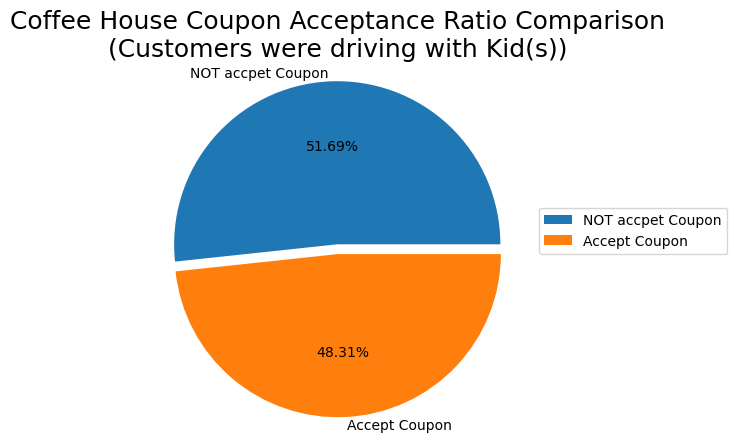

In [138]:
# Create a pieplot for visualization purpose

coffee_house_Kids_incar_ratio = coffee_house_Kids_incar['Y'].value_counts(True)

fig_coffee_house_Kids_incar = np.array([coffee_house_Kids_incar_ratio[0], coffee_house_Kids_incar_ratio[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_coffee_house_Kids_incar, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Coffee House Coupon Acceptance Ratio Comparison\n(Customers were driving with Kid(s))', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

In [139]:
coffee_house_partner_incar = coffee_house_df[coffee_house_df['passenger'] == 'Partner']
coffee_house_partner_incar['Y'].value_counts()

1    174
0    131
Name: Y, dtype: int64

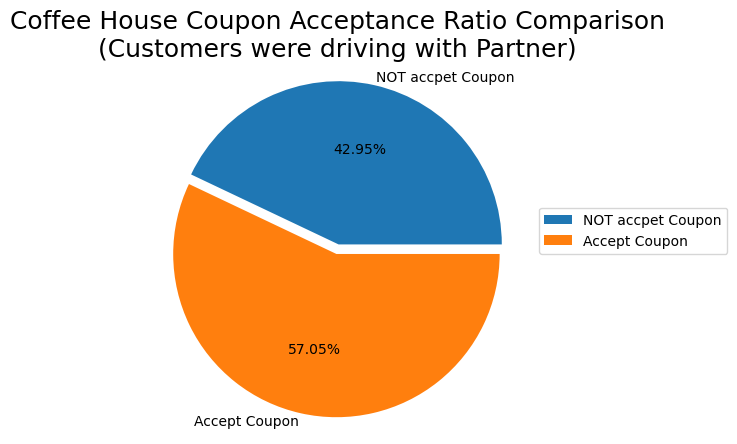

In [140]:
# Create a pieplot for visualization purpose

coffee_house_partner_incar_ratio = coffee_house_partner_incar['Y'].value_counts(True)

fig_coffee_house_partner_incar = np.array([coffee_house_partner_incar_ratio[0], coffee_house_partner_incar_ratio[1]])

mylabels = ['NOT accpet Coupon', 'Accept Coupon']

plt.pie(fig_coffee_house_partner_incar, labels = mylabels, autopct = '%1.2f%%', labeldistance = 1.05, explode = [0.03, 0.03])

# Add Plot title and legend
plt.title('Coffee House Coupon Acceptance Ratio Comparison\n(Customers were driving with Partner)', fontsize = 18)

plt.legend(labels = mylabels, bbox_to_anchor = (1.3, 0.55), loc = 'right')
plt.axis('equal')

# Show the plot
plt.show()

# Conclusion

From above data analysis, customers who were driving with Friend(s) or Partner have higher Coffee House coupon acceptance ratio than customers who were driving Alone or with Kids. In addition, customers' age, occupation, marital status, and income could also influence customers' decision making, but will need further investigation to define the impact as an individual factor or as a group factors.